In [26]:
import  pandas as pd 
import numpy as np
import re
import nltk
import requests
import json
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from langdetect import detect
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
#nltk.download()
from nltk.corpus import stopwords
from textblob import TextBlob
from tashaphyne.stemming import ArabicLightStemmer
from nltk.stem.isri import ISRIStemmer

In [4]:
url = 'https://egyptinnovate.com/export/news/all/get/json?keywords='
x = requests.get(url)
x = x.json()
out_file = open("egy_data.json", "w")
json.dump(x, out_file, indent=6)

out_file.close()
#print(x)


In [5]:
with open("egy_data.json") as jsonfile:
    data = json.load(jsonfile)['node']

In [6]:
df = pd.DataFrame(data)
df = df.transpose()
df.head()

,TheTitle,TheDetails,UpdatedDate,ContentLink
0,شركة Zeal المصرية تحصل على تمويل مكون من 6 أرق...,أعلنت شركة Zeal Rewards المصرية للتكنولوجيا ال...,12/24/2020 - 14:21,https://egyptinnovate.com/news/%D8%B4%D8%B1%D9...
1,الاحتفاء بابتكار المؤسسات الصغيرة والمتوسطة: م...,لقد أظهر لنا هذا الوباء كيف يمكننا زيادة تسارع...,12/24/2020 - 14:32,https://egyptinnovate.com/%D8%A3%D8%AE%D8%A8%D...
2,Recognizing SME innovation: The engine of digi...,This pandemic has shown us how we can accelera...,12/24/2020 - 14:32,https://egyptinnovate.com/node/11033
3,"""كلينيدو"" الناشئة في مجال التكنولوجيا الصحية ب...",أعلنت الشركة الناشئة المصرية بمجال التكنولوجيا...,12/23/2020 - 11:26,https://egyptinnovate.com/%D8%A3%D8%AE%D8%A8%D...
4,The Egyptian HealthTech Startup “CliniDo” rais...,The Egyptian HealthTech “CliniDo” has raised s...,12/23/2020 - 11:36,https://egyptinnovate.com/node/11028


In [7]:
df['Language']= df['TheDetails'].apply(detect)

In [8]:
df_eng=df[df['Language']=='en'] 
df_ara= df[df['Language']=='ar']

In [9]:
df_eng.info()

<class 'pandas.core.frame.DataFrame'>
Index: 560 entries, 2 to 1102
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   TheTitle     560 non-null    object
 1   TheDetails   560 non-null    object
 2   UpdatedDate  560 non-null    object
 3   ContentLink  560 non-null    object
 4   Language     560 non-null    object
dtypes: object(5)
memory usage: 26.2+ KB


In [10]:
df_ara.info()

<class 'pandas.core.frame.DataFrame'>
Index: 543 entries, 0 to 1101
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   TheTitle     543 non-null    object
 1   TheDetails   543 non-null    object
 2   UpdatedDate  543 non-null    object
 3   ContentLink  543 non-null    object
 4   Language     543 non-null    object
dtypes: object(5)
memory usage: 25.5+ KB


In [11]:
sum(df.duplicated())
df_eng.reset_index(drop=True, inplace=True)

In [16]:
stop_words = set(stopwords.words("english"))
corpus=[]
df_eng['word_count'] = df_eng['TheDetails'].apply(lambda x: len(str(x).split(" ")))
ds_count = len(df_eng['word_count'])
for i in range(0, ds_count):
    # Remove punctuation
    text = re.sub('[^a-zA-Z]', ' ', str(df_eng['TheDetails'][i]))
    #print(i)
    # Convert to lowercase
    text = text.lower()
    
    # Remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # Remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    # Convert to list from string
    text = text.split()
    
    # Stemming
    ps=PorterStemmer()
    
    # Lemmatisation
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(ps.stem(word)) for word in text if not word in  
            stop_words] 
    text = " ".join(text)
    corpus.append(text)

<ipython-input-16-bfbcee61d7d2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eng['word_count'] = df_eng['TheDetails'].apply(lambda x: len(str(x).split(" ")))


In [19]:
cv=CountVectorizer(max_df=0.8,stop_words=stop_words, max_features=10000, ngram_range=(1,3))
X=cv.fit_transform(corpus)
list(cv.vocabulary_.keys())

['pandem',
 'shown',
 'acceler',
 'progress',
 'toward',
 'connect',
 'human',
 'work',
 'togeth',
 'across',
 'border',
 'sector',
 'larg',
 'small',
 'busi',
 'confid',
 'ever',
 'last',
 'impact',
 'medium',
 'size',
 'micro',
 'enterpris',
 'sme',
 'live',
 'commun',
 'around',
 'world',
 'tech',
 'key',
 'achiev',
 'level',
 'digit',
 'transform',
 'strive',
 'power',
 'bring',
 'social',
 'econom',
 'develop',
 'like',
 'industri',
 'celebr',
 'five',
 'year',
 'sinc',
 'launch',
 'itu',
 'telecom',
 'award',
 'programm',
 'adopt',
 'unit',
 'nation',
 'sustain',
 'goal',
 'sdg',
 'enter',
 'decad',
 'action',
 'support',
 'entrepreneurship',
 'driven',
 'innov',
 'never',
 'import',
 'recogn',
 'start',
 'creat',
 'solut',
 'smart',
 'citi',
 'health',
 'financ',
 'area',
 'major',
 'economi',
 'entrepreneur',
 'need',
 'encourag',
 'govern',
 'intern',
 'organ',
 'thrive',
 'context',
 'introduc',
 'reduc',
 'membership',
 'fee',
 'januari',
 'greater',
 'particip',
 'yesterday

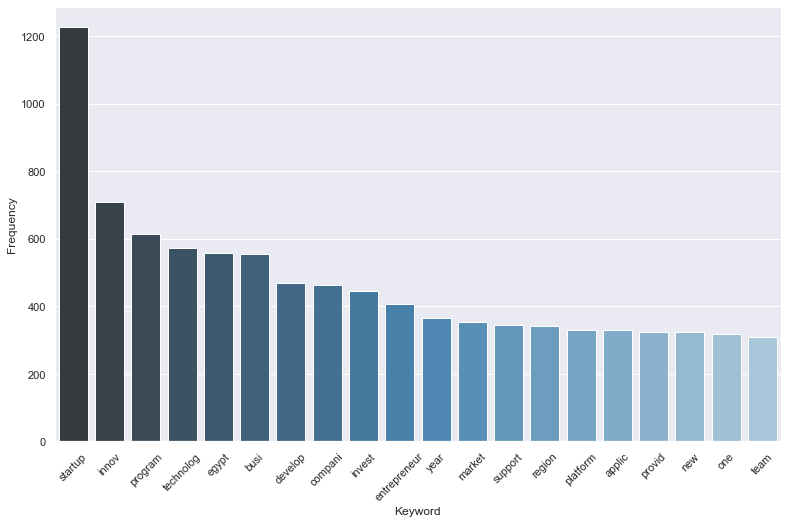

In [46]:
 #n-grams
# View most frequently occuring keywords
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in      
                   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                       reverse=True)
    return words_freq[:n]

# Convert most freq words to dataframe for plotting bar plot, save as CSV
top_words = get_top_n_words(corpus, n=20)
top_df = pd.DataFrame(top_words)
top_df.columns=["Keyword", "Frequency"]
#print(top_df)
top_df.to_csv( '_top_words.csv')

# Barplot of most freq words
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(x="Keyword", y="Frequency", data=top_df, palette="Blues_d")
g.set_xticklabels(g.get_xticklabels(), rotation=45)
g.figure.savefig("_keyword.png", bbox_inches = "tight")


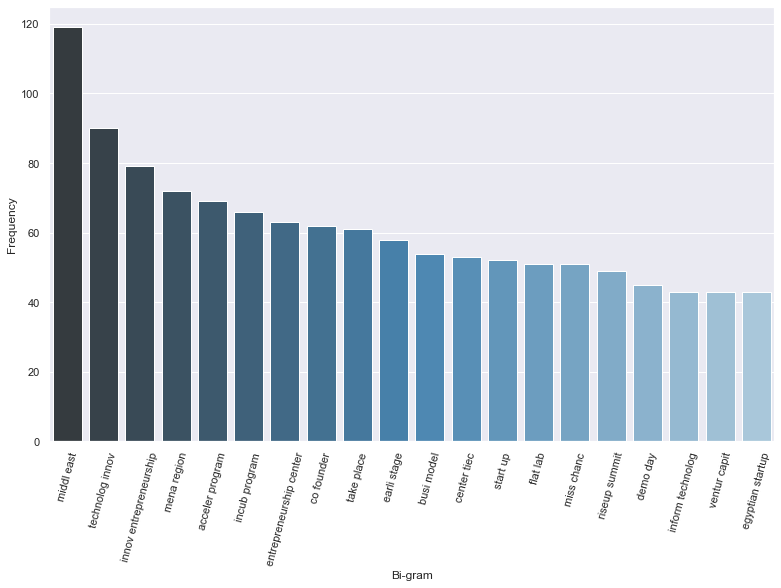

In [47]:
# Most frequently occuring bigrams
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

# Convert most freq bigrams to dataframe for plotting bar plot, save as CSV
top2_words = get_top_n2_words(corpus, n=20)
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Frequency"]
#print(top2_df)
top2_df.to_csv( '_bigrams.csv')

# Barplot of most freq Bi-grams
sns.set(rc={'figure.figsize':(13,8)})
h=sns.barplot(x="Bi-gram", y="Frequency", data=top2_df, palette="Blues_d")
h.set_xticklabels(h.get_xticklabels(), rotation=75)
h.figure.savefig("_bi-gram.png", bbox_inches = "tight")

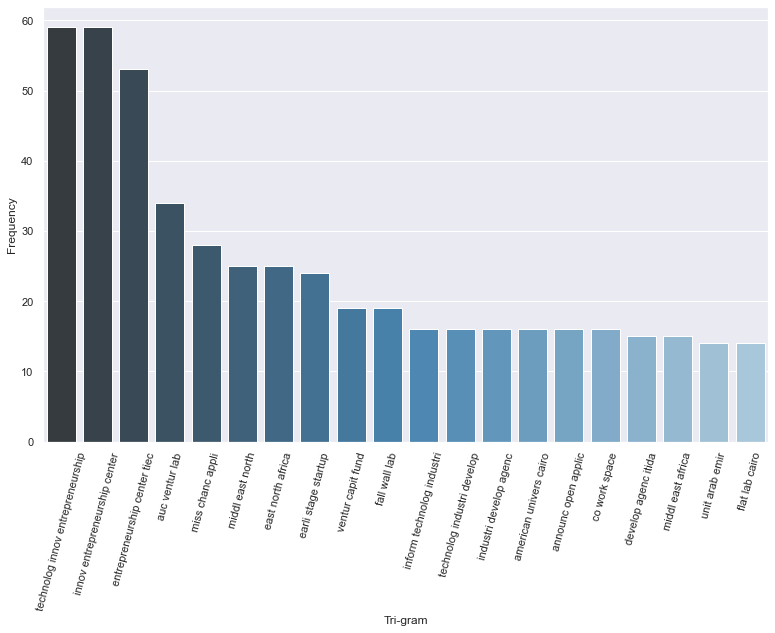

In [24]:
# Most frequently occuring Tri-grams
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

# Convert most freq trigrams to dataframe for plotting bar plot, save as CSV
top3_words = get_top_n3_words(corpus, n=20)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Frequency"]
#print(top3_df)
top3_df.to_csv('_trigrams.csv')

# Barplot of most freq Tri-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
j=sns.barplot(x="Tri-gram", y="Frequency", data=top3_df, palette="Blues_d")
j.set_xticklabels(j.get_xticklabels(), rotation=75)
j.figure.savefig("_tri-gram.png", bbox_inches = "tight")


# TF-IDF Algorithm

In [27]:
# Get TF-IDF (term frequency/inverse document frequency) -- 
# TF-IDF lists word frequency scores that highlight words that 
# are more important to the context rather than those that 
# appear frequently across documents
 
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(X)

# Get feature names
feature_names=cv.get_feature_names()
 
# Fetch document for which keywords needs to be extracted
doc=corpus[ds_count-1]
 
# Generate tf-idf for the given document
tf_idf_vector=tfidf_transformer.transform(cv.transform([doc]))

In [28]:
res_tf_idf= pd.DataFrame(columns= ['kaywords','weight']) 

In [29]:
def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)
 
def extract_topn_from_vector(feature_names, sorted_items, topn=10):
    
    # Use only topn items from vector
    sorted_items = sorted_items[:topn]
    score_vals = []
    feature_vals = []
    
    # Word index and corresponding tf-idf score
    for idx, score in sorted_items:
        
        # Keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])
 
    # Create tuples of feature,score
    # Results = zip(feature_vals,score_vals)
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    return results
for i in range(ds_count):
    dict1={}
    doc=corpus[i]
    tf_idf_vector=tfidf_transformer.transform(cv.transform([doc]))
    # Sort the tf-idf vectors by descending order of scores
    sorted_items=sort_coo(tf_idf_vector.tocoo())

    # Extract only the top n; n here is 25
    keywords=extract_topn_from_vector(feature_names,sorted_items,10)
    dict1['kaywords']= keywords.keys()
    dict1['weight']= keywords.values()
    res_tf_idf =res_tf_idf.append(dict1,ignore_index=True)
   

In [30]:
res_tf_idf.reset_index(drop=True, inplace=True)
res_tf_idf.head()

,kaywords,weight
0,"(sme, itu, digit, viet nam, viet, nam, sme awa...","(0.406, 0.276, 0.212, 0.179, 0.179, 0.179, 0.1..."
1,"(clinido, healthcar, healthcar sector, mina sh...","(0.567, 0.362, 0.218, 0.162, 0.162, 0.152, 0.1..."
2,"(tabbi, pay, pay later, buy pay later, buy pay...","(0.465, 0.285, 0.266, 0.199, 0.199, 0.198, 0.1..."
3,"(startup launchpad, launchpad, startup launchp...","(0.375, 0.273, 0.187, 0.187, 0.165, 0.163, 0.1..."
4,"(th round, mobil app, need, incub, welcom, sta...","(0.178, 0.147, 0.139, 0.139, 0.139, 0.138, 0.1..."


In [31]:
res_tf_idf.to_csv('english_keywords.csv')

# Arabic dataset

In [32]:
df_ara['word_count'] = df_ara['TheDetails'].apply(lambda x: len(str(x).split(" ")))
ds_count_ara = len(df_ara['word_count'])

<ipython-input-32-8a0623ce17c9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ara['word_count'] = df_ara['TheDetails'].apply(lambda x: len(str(x).split(" ")))


In [33]:
stops = set(stopwords.words("arabic"))
stop_word_comp = {"،","آض","آمينَ","آه","آهاً","آي","أ","أب","أجل","أجمع","أخ","أخذ","أصبح","أضحى","أقبل","أقل","أكثر","ألا","أم","أما","أمامك","أمامكَ","أمسى","أمّا","أن","أنا","أنت","أنتم","أنتما","أنتن","أنتِ","أنشأ","أنّى","أو","أوشك","أولئك","أولئكم","أولاء","أولالك","أوّهْ","أي","أيا","أين","أينما","أيّ","أَنَّ","أََيُّ","أُفٍّ","إذ","إذا","إذاً","إذما","إذن","إلى","إليكم","إليكما","إليكنّ","إليكَ","إلَيْكَ","إلّا","إمّا","إن","إنّما","إي","إياك","إياكم","إياكما","إياكن","إيانا","إياه","إياها","إياهم","إياهما","إياهن","إياي","إيهٍ","إِنَّ","ا","ابتدأ","اثر","اجل","احد","اخرى","اخلولق","اذا","اربعة","ارتدّ","استحال","اطار","اعادة","اعلنت","اف","اكثر","اكد","الألاء","الألى","الا","الاخيرة","الان","الاول","الاولى","التى","التي","الثاني","الثانية","الذاتي","الذى","الذي","الذين","السابق","الف","اللائي","اللاتي","اللتان","اللتيا","اللتين","اللذان","اللذين","اللواتي","الماضي","المقبل","الوقت","الى","اليوم","اما","امام","امس","ان","انبرى","انقلب","انه","انها","او","اول","اي","ايار","ايام","ايضا","ب","بات","باسم","بان","بخٍ","برس","بسبب","بسّ","بشكل","بضع","بطآن","بعد","بعض","بك","بكم","بكما","بكن","بل","بلى","بما","بماذا","بمن","بن","بنا","به","بها","بي","بيد","بين","بَسْ","بَلْهَ","بِئْسَ","تانِ","تانِك","تبدّل","تجاه","تحوّل","تلقاء","تلك","تلكم","تلكما","تم","تينك","تَيْنِ","تِه","تِي","ثلاثة","ثم","ثمّ","ثمّة","ثُمَّ","جعل","جلل","جميع","جير","حار","حاشا","حاليا","حاي","حتى","حرى","حسب","حم","حوالى","حول","حيث","حيثما","حين","حيَّ","حَبَّذَا","حَتَّى","حَذارِ","خلا","خلال","دون","دونك","ذا","ذات","ذاك","ذانك","ذانِ","ذلك","ذلكم","ذلكما","ذلكن","ذو","ذوا","ذواتا","ذواتي","ذيت","ذينك","ذَيْنِ","ذِه","ذِي","راح","رجع","رويدك","ريث","رُبَّ","زيارة","سبحان","سرعان","سنة","سنوات","سوف","سوى","سَاءَ","سَاءَمَا","شبه","شخصا","شرع","شَتَّانَ","صار"
                  ,"صباح","صفر","صهٍ","صهْ","ضد","ضمن","طاق","طالما","طفق","طَق","ظلّ","عاد","عام","عاما","عامة","عدا","عدة","عدد","عدم"
                  ,"عسى","عشر","عشرة","علق","على","عليك","عليه","عليها","علًّ","عن","عند","عندما","عوض","عين","عَدَسْ","عَمَّا","غدا","غير","ـ"
                  ,"ف","فان","فلان","فو","فى","في","فيم","فيما","فيه","فيها","قال","قام","قبل","قد","قطّ","قلما","قوة","كأنّما","كأين","كأيّ","كأيّن"
                  ,"كاد","كان","كانت","كذا","كذلك","كرب","كل","كلا","كلاهما","كلتا","كلم","كليكما","كليهما","كلّما","كلَّا","كم","كما","كي","كيت"
                  ,"كيف","كيفما","كَأَنَّ","كِخ","لئن","لا","لات","لاسيما","لدن","لدى","لعمر","لقاء","لك","لكم","لكما","لكن","لكنَّما","لكي","لكيلا"
                  ,"للامم","لم","لما","لمّا","لن","لنا","له","لها","لو","لوكالة","لولا","لوما","لي","لَسْتَ","لَسْتُ","لَسْتُم","لَسْتُمَا","لَسْتُنَّ","لَسْتِ","لَسْنَ"
                  ,"لَعَلَّ","لَكِنَّ","لَيْتَ","لَيْسَ","لَيْسَا","لَيْسَتَا","لَيْسَتْ","لَيْسُوا","لَِسْنَا","ما","ماانفك","مابرح","مادام","ماذا","مازال","مافتئ"
                  ,"مايو","متى","مثل","مذ","مساء","مع","معاذ","مقابل","مكانكم","مكانكما","مكانكنّ","مكانَك","مليار","مليون","مما","ممن"
                  ,"من","منذ","منها","مه","مهما","مَنْ","مِن","نحن","نحو","نعم","نفس","نفسه","نهاية","نَخْ","نِعِمّا","نِعْمَ","ها","هاؤم"
                  ,"هاكَ","هاهنا","هبّ","هذا","هذه","هكذا","هل","هلمَّ","هلّا","هم","هما","هن","هنا","هناك","هنالك","هو","هي","هيا"
                  ,"هيت","هيّا","هَؤلاء","هَاتانِ","هَاتَيْنِ","هَاتِه","هَاتِي","هَجْ","هَذا","هَذانِ","هَذَيْنِ","هَذِه","هَذِي","هَيْهَاتَ","و","و6","وا","واحد","واضاف","واضافت","واكد","وان","واهاً","واوضح","وراءَك","وفي"
                  ,"وقال","وقالت","وقد","وقف","وكان","وكانت","ولا","ولم","ومن","مَن","وهو","وهي","ويكأنّ","وَيْ","وُشْكَانََ","يكون","يمكن","يوم","ّأيّان"}
ArListem = ArabicLightStemmer()


In [34]:
def stem(text):
    zen = TextBlob(text)
    words = zen.words
    cleaned = list()
    for w in words:
        ArListem.light_stem(w)
        cleaned.append(ArListem.get_root())
    return " ".join(cleaned)

import pyarabic.araby as araby
def normalizeArabic(text):
    text = text.strip()
    text = re.sub("[إأٱآا]", "ا", text)
    text = re.sub("ى", "ي", text)
    text = re.sub("ؤ", "ء", text)
    text = re.sub("ئ", "ء", text)
    text = re.sub("ة", "ه", text)
    noise = re.compile(""" ّ    | # Tashdid
                             َ    | # Fatha
                             ً    | # Tanwin Fath
                             ُ    | # Damma
                             ٌ    | # Tanwin Damm
                             ِ    | # Kasra
                             ٍ    | # Tanwin Kasr
                             ْ    | # Sukun
                             ـ     # Tatwil/Kashida
                         """, re.VERBOSE)
    text = re.sub(noise, '', text)
    text = re.sub(r'(.)\1+', r"\1\1", text) # Remove longation
    return araby.strip_tashkeel(text)
    
def remove_stop_words(text):
    zen = TextBlob(text)
    words = zen.words
    return " ".join([w for w in words if not w in stops and not w in stop_word_comp and len(w) >= 2])

In [35]:
def clean_text(text):
    ## Clean for tweets
    #text = clean_tweet(text)
    ## Remove punctuations
    text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,،-./:;<=>؟?@[\]^_`{|}~"""), ' ', text)  # remove punctuation
    ## remove extra whitespace
    text = re.sub('\s+', ' ', text)  
    ## Remove Emojis
    #text = remove_emoji(text)
    ## Convert text to lowercases
    text = text.lower()
    ## Arabisy the text
    #text = to_arabic(text)
    ## Remove stop words
    text = remove_stop_words(text)
    ## Remove numbers
    text = re.sub("\d+", " ", text)
    ## Remove Tashkeel
    text = normalizeArabic(text)
    #text = re.sub('\W+', ' ', text)
    text = re.sub('[A-Za-z]+',' ',text)
    text = re.sub(r'\\u[A-Za-z0-9\\]+',' ',text)
    ## remove extra whitespace
    text = re.sub('\s+', ' ', text)  
    #Stemming
    #text = stem(text)
    return text

In [36]:
df_ara.reset_index(drop = True, inplace = True)
corpus_ara=[]
for i in range(0, ds_count_ara):
    text_ara = stem(str(df_ara['TheDetails'][i]))
    #text_ara =  normalizeArabic(text_ara) 
    #text_ara =  remove_stop_words(text_ara)
    text_ara = clean_text(text_ara)
    corpus_ara.append(text_ara)

In [37]:
corpus_ara[70]

'حصل شرك مجد شرك نشء مصر قدم هرب ذك ركز ثلث سبق روز حصل شرك لفلسطن ركز ءل ليه لبن مجد ركز ثلث حصل شرك نشء ذكر ءتمن بقم دلر حصل مجد صفق كرم بشر وضع جهز لجن وزد يست تمم نظم حدث روز دسمبر لءل نوع شرك سبق شرك نشء بعع دول شرق وسط شرك نشء عرض قدم مدد دقءق تلي دقءق سءل جوب فقو قول حسن حمد رءس نفذ مجد ذكر ورخ مره مجد قدم رتت هرم كنت حدد كبر فءز دفع جرب شرك ترك ءثر كبر شرق وسط شمال فرق مصل جهد علم ذكاء شرك مجد حضن عمل ركز بدع كنلج ورد عمل وفر شرك هرب ذكك جمع سكن صر وفر صلل ٪ وتر كهرب عمل رسل نبه حمل زءد طوق صدر قرر سوع سهل طوق قلل شكل كبر بعث ثون كسد مكن خدم نهء رقب هلك دفع وتر عمل شرك حلو سمم كبر جمع خرف جمع شرك درر ولج فيو'

In [38]:
cv_ara=CountVectorizer(max_df=0.8,stop_words=stops, max_features=10000, ngram_range=(1,3))
X_ara=cv_ara.fit_transform(corpus_ara)
list(cv_ara.vocabulary_.keys())

['علن',
 'مصر',
 'كنلج',
 'ول',
 'حصل',
 'ثمر',
 'حدد',
 'لءك',
 'كون',
 'رقم',
 'دلر',
 'مرك',
 'فصح',
 'حجم',
 'بون',
 'صحف',
 'نقل',
 'مقع',
 'منو',
 'صبح',
 'الان',
 'جزءا',
 'حضن',
 'جمع',
 'ملك',
 'حد',
 'تمم',
 'ءسس',
 'عوم',
 'عمر',
 'عبد',
 'بلل',
 'حمد',
 'هدف',
 'تمك',
 'خدم',
 'ربط',
 'طرق',
 'دفع',
 'طوق',
 'سحب',
 'صرف',
 'وجر',
 'قدم',
 'رمز',
 'قوم',
 'وفر',
 'جهز',
 'مسح',
 'ءكد',
 'جور',
 'مره',
 'نقط',
 'طيع',
 'بدل',
 'كفءا',
 'خلف',
 'عني',
 'للء',
 'حلل',
 'قءم',
 'نتج',
 'لمدفعت',
 'مكن',
 'لقق',
 'رسل',
 'ضمم',
 'طعم',
 'مقه',
 'صلن',
 'جمل',
 'غره',
 'وصل',
 'نوع',
 'قرر',
 'فكر',
 'لوح',
 'علم',
 'لخص',
 'منح',
 'قدر',
 'نبء',
 'نفق',
 'لبن',
 'وجد',
 'ذكر',
 'بءع',
 'عرض',
 'رءي',
 'نفذ',
 'طلق',
 'سلك',
 'هلك',
 'فعل',
 'شعر',
 'بنت',
 'زود',
 'تير',
 'شرر',
 'قول',
 'رءس',
 'ركز',
 'حقق',
 'شمل',
 'لمل',
 'ملل',
 'احد',
 'لت',
 'جرب',
 'سهل',
 'عبر',
 'هتف',
 'حمل',
 'حلق',
 'ذوي',
 'خبر',
 'مجل',
 'خطط',
 'جدد',
 'نمم',
 'تسع',
 'نطق',
 'صدر',
 'صور',
 'نب

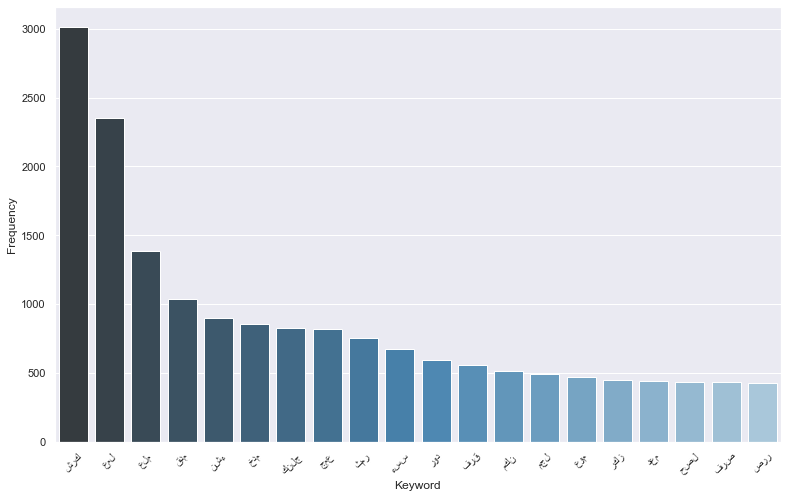

In [49]:
#n-grams
# View most frequently occuring keywords
def get_top_n_words(corpus_ara, n=None):
    vec = CountVectorizer().fit(corpus_ara)
    bag_of_words = vec.transform(corpus_ara)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in      
                   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                       reverse=True)
    return words_freq[:n]

# Convert most freq words to dataframe for plotting bar plot, save as CSV
top_words = get_top_n_words(corpus_ara, n=20)
top_df = pd.DataFrame(top_words)
top_df.columns=["Keyword", "Frequency"]
#print(top_df)
top_df.to_csv( 'arabic_top_words.csv')

# Barplot of most freq words
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(x="Keyword", y="Frequency", data=top_df, palette="Blues_d")
g.set_xticklabels(g.get_xticklabels(), rotation=45)
g.figure.savefig("arabic_keyword.png", bbox_inches = "tight")


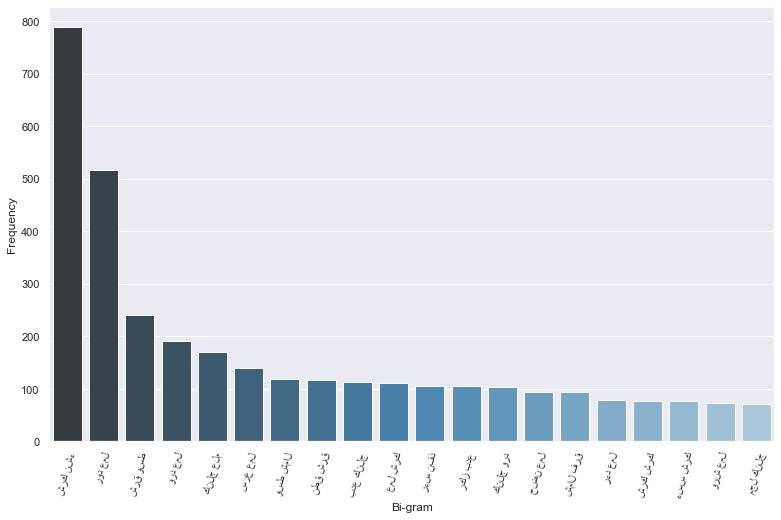

In [40]:
# Most frequently occuring bigrams
def get_top_n2_words(corpus_ara, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  
            max_features=2000).fit(corpus_ara)
    bag_of_words = vec1.transform(corpus_ara)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

# Convert most freq bigrams to dataframe for plotting bar plot, save as CSV
top2_words = get_top_n2_words(corpus_ara, n=20)
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Frequency"]
#print(top2_df)
top2_df.to_csv( 'arabic_bigrams.csv')

# Barplot of most freq Bi-grams
sns.set(rc={'figure.figsize':(13,8)})
h=sns.barplot(x="Bi-gram", y="Frequency", data=top2_df, palette="Blues_d")
h.set_xticklabels(h.get_xticklabels(), rotation=75)
h.figure.savefig("arabic_bi-gram.png", bbox_inches = "tight")

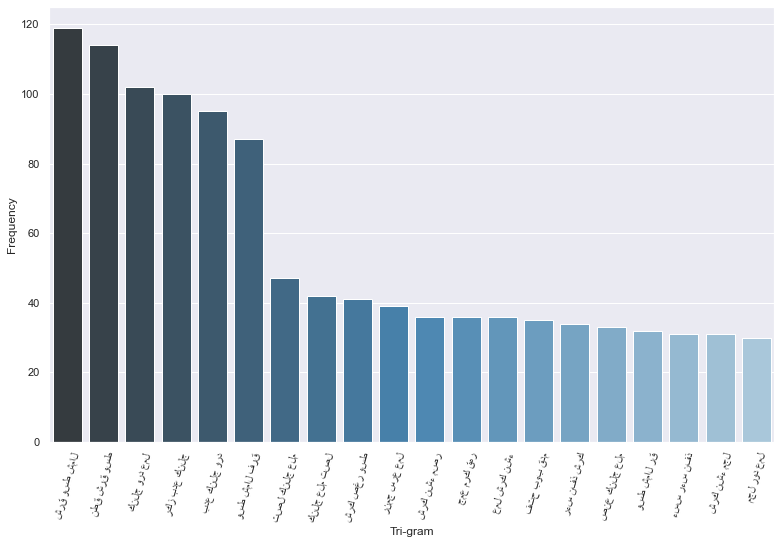

In [51]:
# Most frequently occuring Tri-grams
def get_top_n3_words(corpus_ara, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus_ara)
    bag_of_words = vec1.transform(corpus_ara)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

# Convert most freq trigrams to dataframe for plotting bar plot, save as CSV
top3_words = get_top_n3_words(corpus_ara, n=20)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Frequency"]
#print(top3_df)
top3_df.to_csv('arabic_trigrams.csv')

# Barplot of most freq Tri-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
j=sns.barplot(x="Tri-gram", y="Frequency", data=top3_df, palette="Blues_d")
j.set_xticklabels(j.get_xticklabels(), rotation=75)
j.figure.savefig("arabic_tri-gram.png", bbox_inches = "tight")

In [42]:
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(X_ara)

# Get feature names
feature_names=cv_ara.get_feature_names()
 
# Fetch document for which keywords needs to be extracted
doc=corpus_ara[ds_count_ara-1]
 
# Generate tf-idf for the given document
tf_idf_vector=tfidf_transformer.transform(cv_ara.transform([doc]))

In [43]:
res_tf_idf_ara= pd.DataFrame(columns= ['kaywords','weight']) 

In [44]:
def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)
 
def extract_topn_from_vector(feature_names, sorted_items, topn=10):
    
    # Use only topn items from vector
    sorted_items = sorted_items[:topn]
    score_vals = []
    feature_vals = []
    
    # Word index and corresponding tf-idf score
    for idx, score in sorted_items:
        
        # Keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])
 
    # Create tuples of feature,score
    # Results = zip(feature_vals,score_vals)
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    return results
for i in range(ds_count_ara):
    dict1={}
    doc=corpus_ara[i]
    tf_idf_vector=tfidf_transformer.transform(cv_ara.transform([doc]))
    # Sort the tf-idf vectors by descending order of scores
    sorted_items=sort_coo(tf_idf_vector.tocoo())

    # Extract only the top n; n here is 25
    keywords=extract_topn_from_vector(feature_names,sorted_items,10)
    dict1['kaywords']= keywords.keys()
    dict1['weight']= keywords.values()
    res_tf_idf_ara =res_tf_idf_ara.append(dict1,ignore_index=True)
   

In [45]:
res_tf_idf_ara.reset_index(drop=True, inplace=True)
res_tf_idf_ara.head()

,kaywords,weight
0,"(دفع, صلن, دفع خدم, لوح علم, خدم, لوح, مصر, عم...","(0.298, 0.255, 0.239, 0.16, 0.157, 0.142, 0.12..."
1,"(صغر, صغر وسط, تحد دلو, تحد, دلو تصل, تحد دلو ...","(0.293, 0.261, 0.247, 0.199, 0.176, 0.176, 0.1..."
2,"(لند, رعو, رعو صحح, صحح, شقو, قطع رعو, صح, قدم...","(0.365, 0.334, 0.286, 0.236, 0.227, 0.219, 0.1..."
3,"(دفع, شرر الان دفع, شرر الان, توب, بيع جزء, ال...","(0.321, 0.245, 0.245, 0.245, 0.23, 0.23, 0.18,..."
4,"(رود عمل, رود, سبع, كنلج, رود عمل مجل, حضن عمل...","(0.159, 0.151, 0.142, 0.133, 0.127, 0.127, 0.1..."


In [52]:
res_tf_idf_ara.to_csv('arabic_keywords.csv')